In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gzip

def print_pcs(pc):
    print("First PC has", int(pc.explained_variance_ratio_[0] * 100), "% explained variance")
    print("Second PC has", int(pc.explained_variance_ratio_[1] * 100), "% explained variance")

0      Malignant
1      Malignant
2      Malignant
3      Malignant
4      Malignant
         ...    
564    Malignant
565    Malignant
566    Malignant
567    Malignant
568       Benign
Name: diagnosis, Length: 569, dtype: object
First PC has 44 % explained variance
Second PC has 18 % explained variance
Benign b 0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568     True
Name: diagnosis, Length: 569, dtype: bool
Malignant r 0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool


<Figure size 432x288 with 0 Axes>

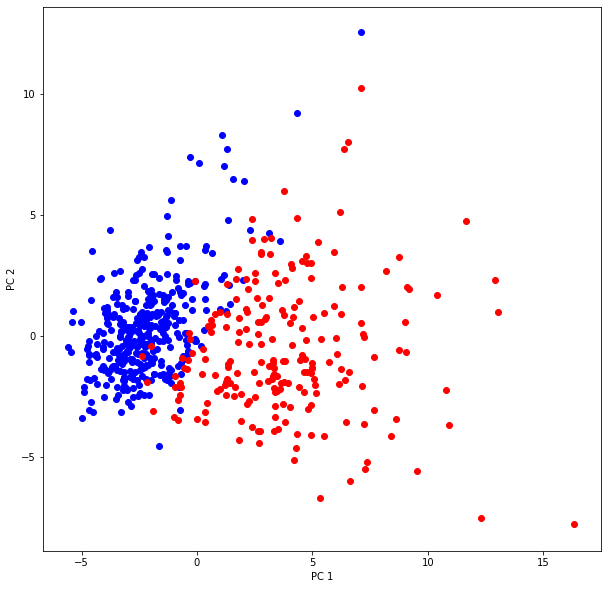

In [63]:
def wdbc():
    df = pd.read_csv('wdbc.data', header=None)
    
    # Make more readable
    df[1].replace('B', 'Benign', inplace=True)
    df[1].replace('M', 'Malignant', inplace=True)
    
    # Set column labels
    df.columns = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
    
    feature_df = df.iloc[:,2:]
    label_df = df.iloc[:,1]
    
    print(label_df)
    
    x = StandardScaler().fit_transform(feature_df)  
    
    pca_breast_cancer = PCA(n_components=2)
    pc_breast_cancer = pca_breast_cancer.fit_transform(x)
    pc_df = pd.DataFrame(data=pc_breast_cancer,  columns=['prin comp 1', 'prin comp 2'])
    
    print_pcs(pca_breast_cancer)
    
    plt.figure()
    plt.figure(figsize=(10, 10))
    plt.xlabel('PC 1') 
    plt.ylabel('PC 2')
    targets = ['Benign', 'Malignant']
    colors = ['b', 'r']
    for target, color in zip(targets, colors):
        indiciesToKeep = label_df == target
        print(target, color, indiciesToKeep)
        plt.scatter(
            pc_df.loc[indiciesToKeep, 'prin comp 1'],
            pc_df.loc[indiciesToKeep, 'prin comp 2'],
            c = color
        )

wdbc()

In [74]:
def gisette():
    
    
    file = gzip.open('gisette.data.gz')
    df = pd.read_csv(file, header=None, delim_whitespace=True)
    file.close()
    
    x = StandardScaler().fit_transform(df)
    
    pca = PCA(n_components=2)
    pc = pca.fit_transform(x)
    pc_df = pd.DataFrame(data=pc,  columns=['prin comp 1', 'prin comp 2'])
    
    print_pcs(pca)
    
    plt.figure()
    plt.figure(figsize=(10, 10))
    plt.xlabel('PC 1') 
    plt.ylabel('PC 2')
    
    label_df = df.iloc[:,0]
    
    targets = [str(i + 1) for i in range(10)]
    
    for target in targets:
        indiciesToKeep = label_df == target
        plt.scatter(
            pc_df.iloc[indiciesToKeep, 'prin comp 1'],
            pc_df.iloc[indiciesToKeep, 'prin comp 2'],
        )
    
    return df 

First PC has 2 % explained variance
Second PC has 2 % explained variance


/Users/kierangill/Documents/School/Machine Learning/inclass/venv/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


NotImplementedError: iLocation based boolean indexing on an integer type is not available

<Figure size 432x288 with 0 Axes>

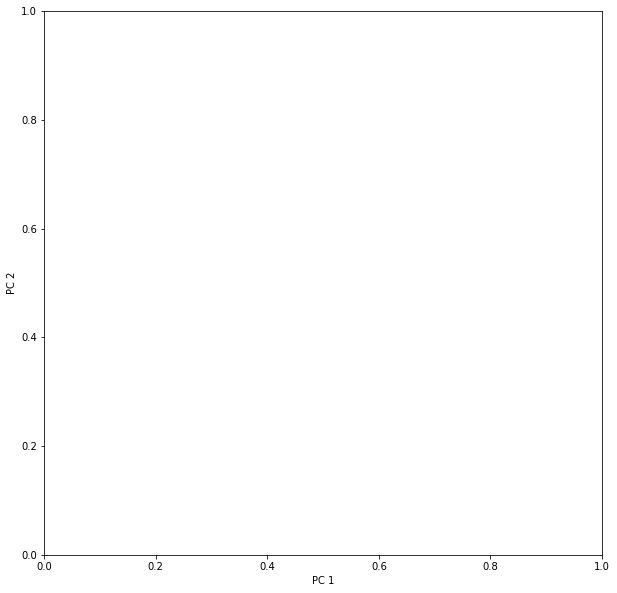

In [75]:
df = gisette()
df.head()

# standardized_data = StandardScaler().fit_transform(df)
# print(standardized_data.shape)